In [1]:
# Based on Zhang/Oxford paper and github/shilewenuw implementation

In [5]:
from Model import Model
import pandas as pd

In [6]:
#dfr = pd.read_csv("new_returns.csv") # returns
dff = pd.read_csv("new_features.csv") # features

In [7]:
dff.shape

(1125, 312)

In [8]:
close_cols = [colname for colname in dff.columns if colname.split()[1] == "close"]
close_cols

['AdM close',
 'AL close',
 'A close',
 'GO close',
 'JS close',
 'KvW close',
 'KA close',
 'SA close',
 'S close',
 'Ve close',
 'Vi close',
 'Z close']

In [9]:
df_close = dff[close_cols].copy()
df_close.rename(columns={colname: colname.split()[0] for colname in df_close.columns}, inplace=True)
df_close.head()

,AdM,AL,A,GO,JS,KvW,KA,SA,S,Ve,Vi,Z
0,229.912597,1048.195089,5258.509097,785.749481,69.970392,21.790732,3065.433564,6791.196084,30.613892,61.681587,3877.559631,521.150292
1,222.457725,1026.394270,5125.827632,767.167567,68.744350,20.976506,3004.030094,6612.089249,29.557249,60.201578,3843.123472,499.684147
2,215.705123,1025.809013,5080.297423,758.672978,69.116046,21.017217,2963.956251,6939.832461,30.060412,60.136283,3805.161980,499.684147
3,219.054413,1035.758381,5120.078868,763.318457,69.215905,21.159707,2969.127069,6837.273361,30.146668,60.223342,3811.257294,492.358399
4,213.922436,1022.882729,5066.500391,753.363860,68.486382,20.966328,2947.366541,6743.632443,30.132292,59.374513,3777.989667,478.388368


In [10]:
import numpy as np

For Loop

In [11]:
iters = 100

In [22]:
old_coeffs = np.ones(12) / 12.0

In [23]:
old_coeffs

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [24]:
portfolio_weights = []

In [25]:
profits = []

In [32]:
#model = Model()

In [26]:
for i in range(iters):
    print(f"Iteration: {i+1}")
    model = Model()
    next_index = i-iters
    coeffs = model.get_allocations(df_close[i:next_index])
    hourly_profit = np.sum(( np.multiply(df_close.iloc[next_index-1].to_numpy()[0], old_coeffs) - np.multiply(df_close.iloc[next_index].to_numpy()[0], coeffs)))
    print(f"Profit = {hourly_profit}")
    profits.append(hourly_profit)
    print(f"Cumulative Profit = {sum(profits)}")
    temp_coeffs = np.append(coeffs, 0) # add 0 to cash asset
    portfolio_weights.append(temp_coeffs)
    old_coeffs = coeffs
    print("---------------")

Iteration: 1
1/1 [==============================] - 0s 401ms/step
Profit = 0.27010103619763015
Cumulative Profit = 0.27010103619763015
---------------
Iteration: 2
1/1 [==============================] - 0s 494ms/step
Profit = 0.43216419219970703
Cumulative Profit = 0.7022652283973372
---------------
Iteration: 3
1/1 [==============================] - 0s 360ms/step
Profit = 0.9183597564697266
Cumulative Profit = 1.6206249848670637
---------------
Iteration: 4
1/1 [==============================] - 0s 365ms/step
Profit = -0.8643300533294678
Cumulative Profit = 0.756294931537596
---------------
Iteration: 5


1/1 [==============================] - 0s 351ms/step
Profit = -0.3241310119628906
Cumulative Profit = 0.43216391957470535
---------------
Iteration: 6


1/1 [==============================] - 0s 351ms/step
Profit = 6.198883056640625e-06
Cumulative Profit = 0.432170118457762
---------------
Iteration: 7
1/1 [==============================] - 0s 344ms/step
Profit = -1.0804266929626465
Cumulative Profit = -0.6482565745048845
---------------
Iteration: 8
1/1 [==============================] - 0s 349ms/step
Profit = 0.4321727752685547
Cumulative Profit = -0.2160837992363298
---------------
Iteration: 9
1/1 [==============================] - 0s 341ms/step
Profit = 0.8643455505371094
Cumulative Profit = 0.6482617513007796
---------------
Iteration: 10
1/1 [==============================] - 1s 502ms/step
Profit = 0.7022552490234375
Cumulative Profit = 1.350517000324217
---------------
Iteration: 11
1/1 [==============================] - 0s 345ms/step
Profit = -0.1080470085144043
Cumulative Profit = 1.2424699918098128
---------------
Iteration: 12
1/1 [==============================] - 0s 358ms/step
Profit = -0.9183597564697266
Cumulative Profi

In [27]:
profits

[0.27010103619763015,
 0.4321642,
 0.91835976,
 -0.86433005,
 -0.324131,
 6.198883e-06,
 -1.0804267,
 0.43217278,
 0.86434555,
 0.70225525,
 -0.10804701,
 -0.91835976,
 1.9073486e-06,
 -1.6746378,
 0.054016113,
 0.27010727,
 -0.81032944,
 -1.4045258,
 -3.0791898,
 0.21608901,
 0.6482363,
 -0.54021263,
 1.6206427,
 1.2424736,
 -0.5942211,
 -0.6482544,
 -0.8103256,
 1.3505344,
 -0.21608543,
 -0.8103094,
 -0.8643284,
 -0.7562828,
 -0.37815857,
 1.4045467,
 0.9183426,
 0.9723797,
 -1.0263963,
 1.1884642,
 1.7826738,
 0.64826393,
 -0.054016113,
 0.2160759,
 -2.2148628,
 0.108044624,
 -2.052784,
 -1.5125942,
 0.37815523,
 -0.43217468,
 0.27010345,
 0.05403328,
 -1.0264072,
 0.48619175,
 -1.0263929,
 0.37814522,
 -0.5402107,
 0.43217468,
 -0.4861908,
 -0.81033325,
 0.540226,
 0.54020786,
 -1.8907242,
 -0.27009583,
 -0.54021454,
 -1.7826786,
 4.0515423,
 -1.134428,
 1.8367043,
 -1.6746445,
 -0.27009368,
 1.5125732,
 0.5942302,
 -1.5125837,
 -0.1080389,
 -0.16205597,
 0.9723835,
 -0.4321823,
 -

In [28]:
sum(profits)

-6.2123973711662615

In [29]:
import matplotlib.pyplot as plt

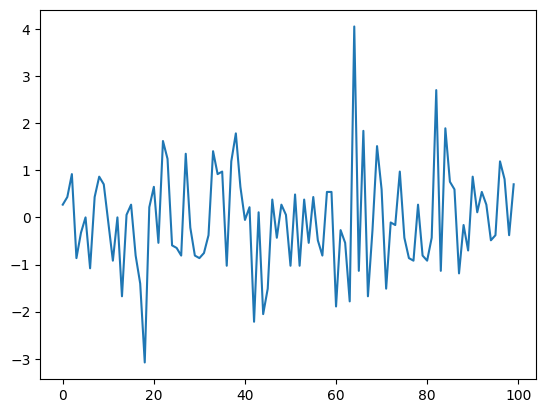

In [30]:
plt.plot(profits)

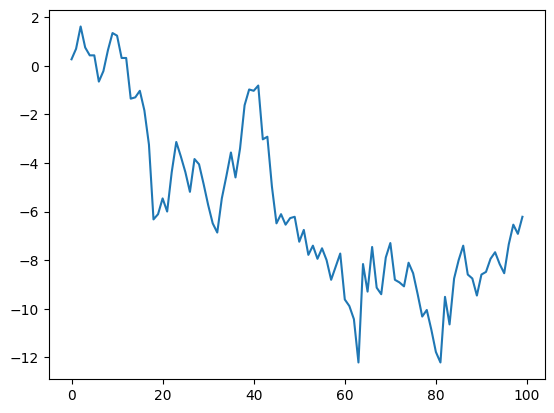

In [31]:
plt.plot(np.cumsum(profits))